Практикум по статистическим тестам

Булыгин Олег:  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)
* [PythonTalk на Кью](https://yandex.ru/q/loves/pythontalk/)

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Никакие экспериментально полученные данные никогда **не подтвердят** какую-либо гипотезу. Это является фундаментальным ограничением. Данные могут лишь не противоречить гипотезе или, наоборот, показывать очень маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае никогда нет оснований утверждать, что выдвинутая гипотеза **доказана**.

1) Нужно сформулировать нулевую и альтернативную гипотезы;   
2) Определить пороговый уровень статистической значимости;  
3) Сколько у нас выборок (какой вариант теста используем)?  
3) Нужен ли односторонний, либо двухсторонний вариант теста?  https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/  
4) Выборки связаны или нет?

## Параметрические тесты
### Тест Стьюдента для независмых выборок

Проверка среднего значения двух выборок или одной выборки с целевым значением

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Есть распространённое мнение, что данный тест требует нормального распределения, но это не совсем так. Если данных не мало, то требуется нормальное распределение выборочных средних, которое соблюдается почти всегда (кроме распределения Коши).
* Одинаковая вариация в выборках.

Гипотеза

* H0: Средние выборок одинаковы / Средние выборки совпадает с целевым значением
* H1: Средние выборок различаются / Средние выборки отличается от целевого значения

#### Одновыборочный тест

<b>Пример.</b> Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим некоторое количество голосующих из Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!

In [ ]:
np.random.seed(42)

population_ages1 = st.norm.rvs(loc=20, scale=45, size=15000)
population_ages2 = st.norm.rvs(loc=20, scale=10, size=10000)
population_ages=np.concatenate((population_ages1, population_ages2))  # Сгенерировали всю популяцию.

india_ages1=st.norm.rvs(loc=19, scale=65, size=2000)  # Индия 1
india_ages2=st.norm.rvs(loc=19, scale=55, size=2000)
india_ages=np.concatenate((india_ages1, india_ages2)) #Выборка
print('Средний возраст всего мира', population_ages.mean())
print('Средний возраст индусов', india_ages.mean())

In [ ]:
population_ages.mean() - india_ages.mean()

In [ ]:
stat, p = st.ttest_1samp(a=india_ages, popmean=population_ages.mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, не отличается от среднего по миру")
else:
    print("Отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, отличается от среднего по миру")

In [ ]:
plt.hist(population_ages, bins=120)
plt.hist(india_ages, bins=120)
plt.show()

<b>Пример.</b> Такой тест показывает, имеют ли две выборки разные средние значения. Здесь нулевая гипотеза заключается в том, что обе группы имеют равные средние.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/apple_samsung.csv')
df

In [ ]:
stat, p = st.ttest_ind(df['Samsung_Score'], df['Apple_Score'])
print(df['Samsung_Score'].mean())
print(df['Apple_Score'].mean())
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if (p < 0.05):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

По умолчанию критерий Стьюдента подразумевает равенство дисперсий двух выборок. Если дисперсии отличаются (можно проверить с помощью F-теста), то нужно использовать поправку Уэлча (Welch). В scipy это реализовано через параметр функции ttest_ind: `equal_var = False`.

Существует [мнение](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html), что использование критерия Уэлча всегда предпочтительнее, будем придерживаться этой позиции.

In [ ]:
stat, p = st.ttest_ind(df['Samsung_Score'], df['Apple_Score'], equal_var=False)
print(df['Samsung_Score'].mean())
print(df['Apple_Score'].mean())
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if (p < 0.05):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

## Непараметрические тесты
### Тест Манна-Уитни
Критерий Манна-Уитни представляет непараметрическую альтернативу критерия Стьюдента для независимых выборок и используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Наблюдения можно проранжировать.

Гипотеза

* H0: Распределения одинаковы.
* H1: Распределения различаются.

In [ ]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = st.mannwhitneyu(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 40.00000, p = 0.47268
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


## Пример проведения A/B теста

Вы работаете в команде разработчиков **онлайн-бизнеса электронной коммерции**. UX-дизайнер очень усердно работал над новой версией страницы продукта в надежде, что это приведет к более высокому коэффициенту конверсии. Менеджер по продукту сказал вам, что **текущий коэффициент конверсии** составляет около **12%** в среднем в течение года и что команда была бы рада **увеличению на 2%**, что означает, что новый дизайн будет считаться успешным, если он поднимет коэффициент конверсии до 14%.

Прежде чем внедрять изменение, команде было бы удобнее протестировать его на небольшом количестве пользователей, чтобы увидеть, как оно работает, поэтому вы предлагаете провести **A/B-тест** на подмножестве пользователей вашей пользовательской базы.

### 1. Планирование эксперимента

Прежде всего, необходимо сформулировать нулевую гипотезу, чтобы не ошибиться при интерпретации результатов.

Поскольку мы не знаем, будет ли новый дизайн работать лучше или хуже, или будет таким же, как наш текущий дизайн, мы выберем <a href="https://en.wikipedia.org/wiki/One-_and_two-tailed_tests">**двусторонний тест**</a>:

$$H_0: p = p_0$$
$$H_a: p \ne p_0$$

где $p$ и $p_0$ — коэффициент конверсии нового и старого дизайна соответственно. Мы также установим **уровень достоверности 95%**:

$$\alpha = 0,05$$

### 2. Сбор и подготовка данных

У нас есть **290583 строк**, каждая из которых представляет сеанс пользователя, а также **5 столбцов**:
* `user_id` - идентификатор пользователя каждой сессии
* `timestamp` - Отметка времени сеанса
* `group` — к какой группе был отнесен пользователь для этого сеанса {`control`, `treatment`}
* `converted` - закончился ли сеанс конверсией или нет (двоичный, `0`=не преобразовано, `1`=конвертировано)

На самом деле мы будем использовать для анализа только столбцы «group» и «converted».

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/SkillFactory/main/ab_example.csv')
df

,user_id,timestamp,group,converted
0,851104,2017-01-21 22:11:48.556739,control,0
1,804228,2017-01-12 08:01:45.159739,control,0
2,661590,2017-01-11 16:55:06.154213,treatment,0
3,853541,2017-01-08 18:28:03.143765,treatment,0
4,864975,2017-01-21 01:52:26.210827,control,1
...,...,...,...,...
290578,751197,2017-01-03 22:28:38.630509,control,0
290579,945152,2017-01-12 00:51:57.078372,control,0
290580,734608,2017-01-22 11:45:03.439544,control,0
290581,697314,2017-01-15 01:20:28.957438,control,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290583 entries, 0 to 290582
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290583 non-null  int64 
 1   timestamp  290583 non-null  object
 2   group      290583 non-null  object
 3   converted  290583 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [ ]:
df.groupby('group')['converted'].count()

group
control      145274
treatment    145309
Name: converted, dtype: int64



Прежде чем мы приступим к выборке данных для получения нашего подмножества, давайте удостоверимся, что нет пользователей, которые были отобраны несколько раз.

In [ ]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'В нашем наборе данных присутствует {multi_users} повторений пользователей по ID')

В нашем наборе данных присутствует 0 повторений пользователей по ID


In [ ]:
users_to_drop = session_counts[session_counts > 1].index

df = df[~df['user_id'].isin(users_to_drop)]
print(f'После очистки имеем {df.shape[0]} записей')

### 3. Расчет конверсии

In [ ]:
conversion_rates = df.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: st.sem(x, ddof=0)            # (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['конверсия', 'сред. кв. отклонение', 'ошибка среднего']


conversion_rates

,конверсия,сред. кв. отклонение,ошибка среднего
group,,,
control,0.120386,0.325413,0.000854
treatment,0.118809,0.323563,0.000849


Судя по приведенной выше статистике, похоже, что **наши два проекта работали очень похоже**, а наш новый дизайн работал немного хуже - **коэффициент конверсии 11,9% против 12%**.

 **Является ли эта разница *статистически значимой***?

### 4. Проверка гипотезы

Последним шагом нашего анализа является проверка нашей гипотезы. Так как у нас очень большая выборка, мы можем использовать <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_ приблизительно_interval">нормальное приближение</a> для расчета нашего значения $p$ (т.е. z-тест).

Опять же, Python делает все вычисления очень простыми. Мы можем использовать модуль `statsmodels.stats.proportion`, чтобы получить значение $p$ и доверительные интервалы:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [ ]:
control_results = df[df['group'] == 'control']['converted']
treatment_results = df[df['group'] == 'treatment']['converted']

In [ ]:
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z-статистика: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ДИ 95% для контрольной группы: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ДИ 95% для тестовой группы: [{lower_treat:.3f}, {upper_treat:.3f}]')

z-статистика: 1.31
p-value: 0.190
ДИ 95% для контрольной группы: [0.119, 0.122]
ДИ 95% для тестовой группы: [0.117, 0.120]


### 5. Выводы

Поскольку наше значение $p=0.19$ намного превышает наше значение $\alpha=0.05$, мы не можем отвергнуть нулевую гипотезу $H_0$, а это означает, что наш новый дизайн не имел существенных отличий (не говоря уже о лучшем) от нашего старого. :(

Кроме того, если мы посмотрим на доверительный интервал для тестовой группы ( [0.117, 0.120]), то заметим, что:
1. Он включает наше базовое значение коэффициента конверсии $12\%$.
2. Он не включает наше целевое значение в $14\%$ ($2\%$ роста, к которому мы стремились).

Это означает, что более вероятно, что истинный коэффициент конверсии нового дизайна будет похож на наш базовый уровень, а не на целевые 15%, на которые мы надеялись. Это еще одно доказательство того, что наш новый дизайн вряд ли будет улучшением нашего старого дизайна!

## Еще один пример проведения A/B теста

Cookie Cats - когда-то популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень.

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать некоторое количество времени или совершать покупки в приложении, чтобы продолжить.

<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, надо рассмотреть влияние изменений на удержание игроков.

### Данные A/B тестирования

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/obulygin/SkillFactory/main/cookie_cats.csv', index_col='Unnamed: 0')
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.</b>

In [ ]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


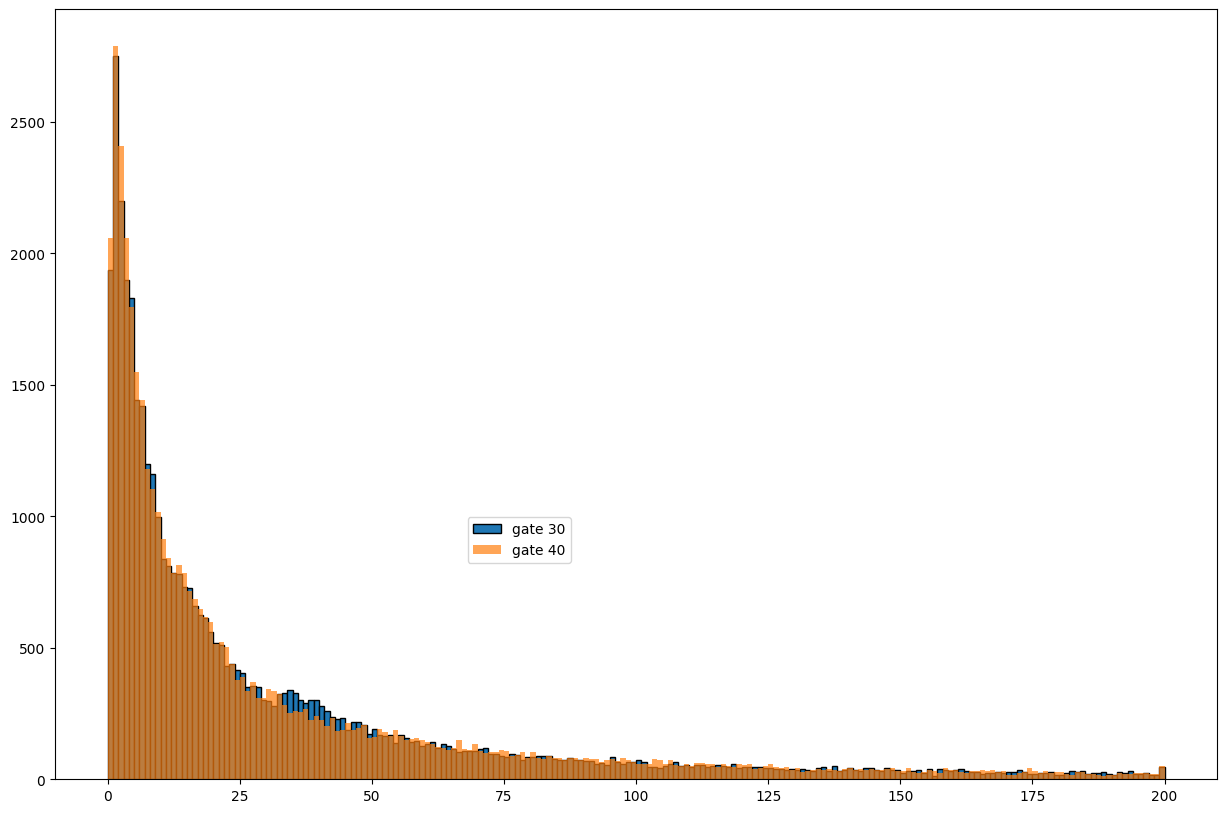

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
# возьмем только пользователей, которые достаточно играли в игру
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

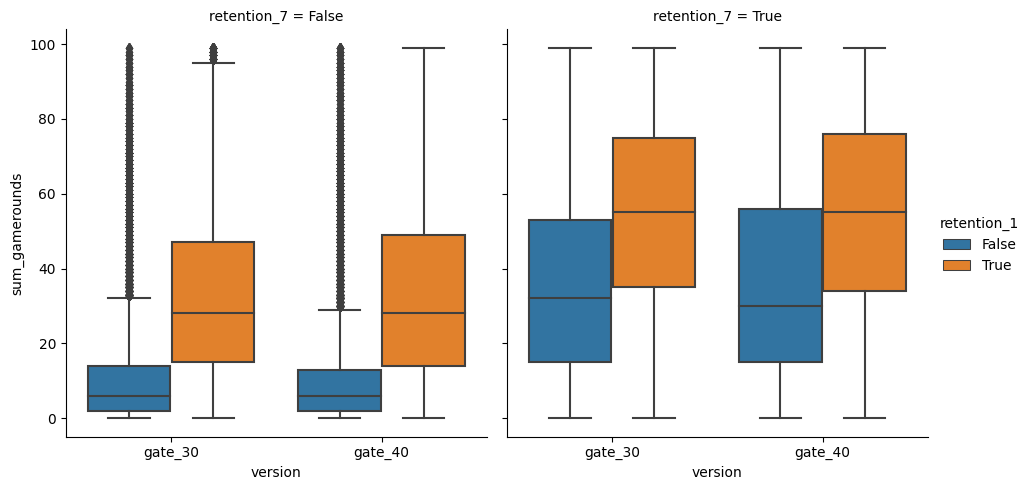

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy()

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95)


In [ ]:
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print(f'Статистика={stat :.3f}, p={p :.3f}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


Статистика=1024331250.500, p=0.050
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

version,gate_30,gate_40
retention_7,0.189265,0.181766
retention_7,0.191617,0.181471
retention_7,0.192337,0.180906
retention_7,0.189929,0.182432
retention_7,0.190044,0.183109
...,...,...
retention_7,0.190313,0.181055
retention_7,0.189929,0.178004
retention_7,0.191090,0.182328
retention_7,0.187183,0.181068


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

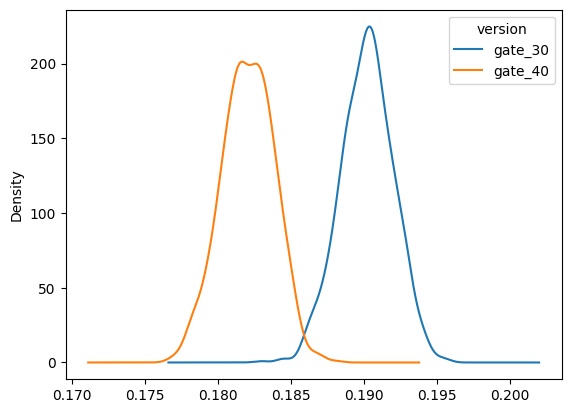

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
display(boot_1d)
# График полученного распределения
boot_1d.plot(kind='density')

Прежде чем использовать t-тест, необходимо проверить равенство дисперссий. Сделаем это с помощью <a href="https://ru.wikipedia.org/wiki/F-%D1%82%D0%B5%D1%81%D1%82">F-теста</a>. Используем собстенную функцию.

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-st.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print(f'Статистика={stat :.3f}, p={p :.3f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.101, p=0.064
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


Теперь можно использовать t-критерий Стьюдента!

In [ ]:
stat, p = st.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])

print(f'Статистика={stat :.3f}, p={p :.3f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=98.887, p=0.000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


<b>Выводы.</b> Наше значение $p$ близко к нулю, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между тем где поставить ворота!

Оставлять отзывы здесь :) https://docs.google.com/forms/d/e/1FAIpQLSfHUyJfJcWFfSzJh3P_3ldzbwspqF-0ReaYNuNJO7AUFRK-TA/viewform